# Fama/French 3 Factors dataset

FF_data_2021_daily.csv is from Kenneth French’s data library 

(specifically from the Fama/French 3 Factors dataset). 

The CSV file has been manipulated a little so that it can be loaded easily with pandas. 

I deleted the preamble at the top of the file and deleted the annual returns data at the end of the file. 

See the following website for more details on this dataset:

(http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html#Research)

Read in the CSV file into Jupyter Notebook using Pandas.

In [1]:
import pandas as pd
df = pd.read_csv('FF_data_2021_daily.csv', index_col='Date',parse_dates=True)

Print the first five rows and the last five rows of the dataset.

In [2]:
df.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,0.10,-0.24,-0.28,0.009
1926-07-02,0.45,-0.32,-0.08,0.009
1926-07-06,0.17,0.27,-0.35,0.009
1926-07-07,0.09,-0.59,0.03,0.009
1926-07-08,0.21,-0.36,0.15,0.009


In [3]:
df.tail()

,Mkt-RF,SMB,HML,RF
Date,,,,
2021-06-24,0.68,0.62,0.23,0.0
2021-06-25,0.32,-0.68,0.46,0.0
2021-06-28,0.23,-0.48,-1.59,0.0
2021-06-29,0.01,-0.23,-0.27,0.0
2021-06-30,0.08,-0.11,0.78,0.0


Compute summary statistics of the four factors:

the market risk premium ‘Mkt-RF’,

the size portfolio ‘SMB’, 

the value portfolio ‘HML’, 

and the risk-free rate ‘RF’

In [4]:
df.describe()

,Mkt-RF,SMB,HML,RF
count,25020.000000,25020.000000,25020.000000,25020.000000
mean,0.030713,0.005042,0.014327,0.012215
std,1.077460,0.588423,0.609841,0.011921
min,-17.440000,-11.620000,-5.980000,-0.003000
25%,-0.400000,-0.250000,-0.240000,0.001000
50%,0.060000,0.020000,0.000000,0.010000
75%,0.500000,0.270000,0.260000,0.020000
max,15.760000,8.210000,8.430000,0.061000


In [5]:
df.cov()

,Mkt-RF,SMB,HML,RF
Mkt-RF,1.160919,-0.102966,0.113510,-0.000200
SMB,-0.102966,0.346241,-0.021834,-0.000085
HML,0.113510,-0.021834,0.371907,0.000082
RF,-0.000200,-0.000085,0.000082,0.000142


In [6]:
statistics_ori = (df.describe(),df.cov())

Plot histograms for each of the four variables.

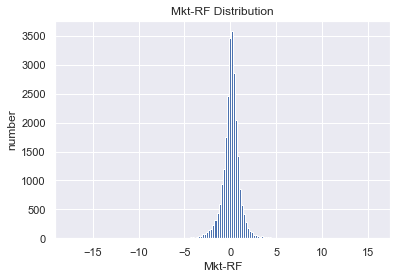

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot style
plt.hist(df['Mkt-RF'],bins = 150)
plt.title('Mkt-RF Distribution')
plt.xlabel('Mkt-RF')
plt.ylabel('number');

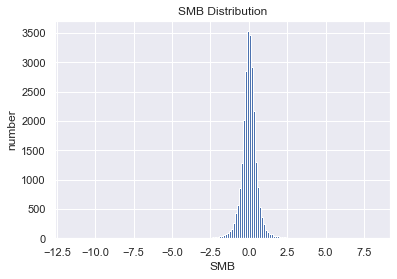

In [8]:
plt.hist(df['SMB'],bins = 150)
plt.title('SMB Distribution')
plt.xlabel('SMB')
plt.ylabel('number');

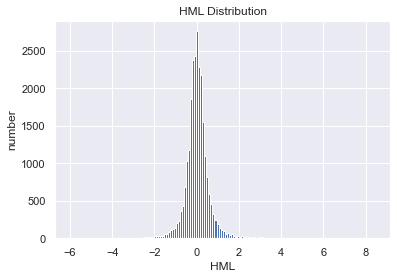

In [9]:
plt.hist(df['HML'],bins = 150)
plt.title('HML Distribution')
plt.xlabel('HML')
plt.ylabel('number');

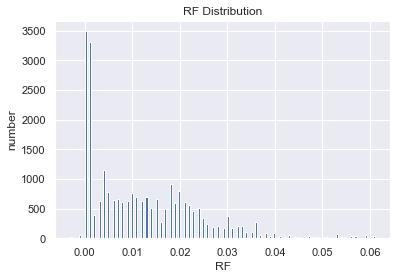

In [10]:
plt.hist(df['RF'],bins = 150)
plt.title('RF Distribution')
plt.xlabel('RF')
plt.ylabel('number');

Create new columns in the dataset that depict the cumulative returns to an investor who invests $1 dollar in each factor from the outset and re-invests winnings and losses. 

Note that the returns in the FF dataset are presented as percentages, so we first must convert these returns to decimal places, then add 1 to each value and finally take the cumulative product. 

In [11]:
cumproduct = ((df/100) + 1 ).cumprod()
cumproduct

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,1.001000,0.997600,0.997200,1.000090
1926-07-02,1.005504,0.994408,0.996402,1.000180
1926-07-06,1.007214,0.997093,0.992915,1.000270
1926-07-07,1.008120,0.991210,0.993213,1.000360
1926-07-08,1.010237,0.987641,0.994703,1.000450
...,...,...,...,...
2021-06-24,503.781098,2.320867,22.797266,21.238714
2021-06-25,505.393198,2.305085,22.902134,21.238714
2021-06-28,506.555602,2.294021,22.537990,21.238714


In [12]:
df['CS_MRP'] = cumproduct['Mkt-RF']-1
df['CS_SMB'] = cumproduct['SMB']-1
df['CS_HML'] = cumproduct['HML']-1
df['CS_RF'] = cumproduct['RF']-1

df

,Mkt-RF,SMB,HML,RF,CS_MRP,CS_SMB,CS_HML,CS_RF
Date,,,,,,,,
1926-07-01,0.10,-0.24,-0.28,0.009,0.001000,-0.002400,-0.002800,0.000090
1926-07-02,0.45,-0.32,-0.08,0.009,0.005504,-0.005592,-0.003598,0.000180
1926-07-06,0.17,0.27,-0.35,0.009,0.007214,-0.002907,-0.007085,0.000270
1926-07-07,0.09,-0.59,0.03,0.009,0.008120,-0.008790,-0.006787,0.000360
1926-07-08,0.21,-0.36,0.15,0.009,0.010237,-0.012359,-0.005297,0.000450
...,...,...,...,...,...,...,...,...
2021-06-24,0.68,0.62,0.23,0.000,502.781098,1.320867,21.797266,20.238714
2021-06-25,0.32,-0.68,0.46,0.000,504.393198,1.305085,21.902134,20.238714
2021-06-28,0.23,-0.48,-1.59,0.000,505.555602,1.294021,21.537990,20.238714


Plot the cumulative returns of these for the four factors

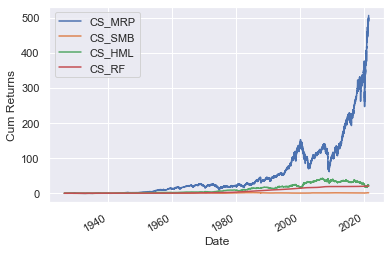

In [13]:
df[['CS_MRP', 'CS_SMB', 'CS_HML','CS_RF']].plot()
plt.ylabel('Cum Returns');

Create a new dataframe that includes dates between 2000-01 and 2020-06 and includes the original four factors but not the cumulative return columns.

In [14]:
df_new = df.loc['2000-01':'2021-06', 'Mkt-RF':'RF']
df_new

,Mkt-RF,SMB,HML,RF
Date,,,,
2000-01-03,-0.71,0.61,-1.40,0.021
2000-01-04,-4.06,0.01,2.06,0.021
2000-01-05,-0.09,0.18,0.19,0.021
2000-01-06,-0.73,-0.42,1.27,0.021
2000-01-07,3.21,-0.49,-1.42,0.021
...,...,...,...,...
2021-06-24,0.68,0.62,0.23,0.000
2021-06-25,0.32,-0.68,0.46,0.000
2021-06-28,0.23,-0.48,-1.59,0.000


Re-calculate summary statistics on the new dataframe and compare to the orginal ones.

In [15]:
df_new.describe(), df_new.cov()

(            Mkt-RF          SMB          HML           RF
 count  5408.000000  5408.000000  5408.000000  5408.000000
 mean      0.031093     0.010655     0.008066     0.006048
 std       1.259386     0.631945     0.754735     0.007124
 min     -12.000000    -4.710000    -4.890000     0.000000
 25%      -0.480000    -0.350000    -0.310000     0.000000
 50%       0.070000     0.020000    -0.010000     0.004000
 75%       0.600000     0.370000     0.300000     0.009000
 max      11.350000     5.540000     6.700000     0.026000,
           Mkt-RF       SMB       HML        RF
 Mkt-RF  1.586052  0.089404  0.087980 -0.000276
 SMB     0.089404  0.399355 -0.043454 -0.000076
 HML     0.087980 -0.043454  0.569624  0.000177
 RF     -0.000276 -0.000076  0.000177  0.000051)

In [16]:
statistics_ori

(             Mkt-RF           SMB           HML            RF
 count  25020.000000  25020.000000  25020.000000  25020.000000
 mean       0.030713      0.005042      0.014327      0.012215
 std        1.077460      0.588423      0.609841      0.011921
 min      -17.440000    -11.620000     -5.980000     -0.003000
 25%       -0.400000     -0.250000     -0.240000      0.001000
 50%        0.060000      0.020000      0.000000      0.010000
 75%        0.500000      0.270000      0.260000      0.020000
 max       15.760000      8.210000      8.430000      0.061000,
           Mkt-RF       SMB       HML        RF
 Mkt-RF  1.160919 -0.102966  0.113510 -0.000200
 SMB    -0.102966  0.346241 -0.021834 -0.000085
 HML     0.113510 -0.021834  0.371907  0.000082
 RF     -0.000200 -0.000085  0.000082  0.000142)

Note that from the year 2000 onwards, the risk-free rate has remained at low levels; the mean is 0.006 with minor fluctuations (std is 0.007), whereas the number for the entire data set is 0.012. On the other hand, the mean value of size portfolio (SMB) in the subset is also quite different from the value for the entire data set: 0.01 in the subset, nonetheless, 0.005 in the entire data set. HML exhibits the opposite pattern to SMB; the mean of HML in the subset is 0.008, and the mean in the entire is 0.01. However, the market risk premium is relatively stable as opposed to the above factors. To conclude, the market has gone through a remarkable structural change. Further studies are required to understand the time change began and the reasons for the variation.

Create additional columns in the new dataframe that calculate cumulative returns assuming the investor invests $1 at the beginning of the year 2000. 

Plot the cumulative returns since 2000 using these new columns.

In [17]:
cumproduct = ( (df_new/100) + 1 ).cumprod() 
cumproduct

,Mkt-RF,SMB,HML,RF
Date,,,,
2000-01-03,0.992900,1.006100,0.986000,1.000210
2000-01-04,0.952588,1.006201,1.006312,1.000420
2000-01-05,0.951731,1.008012,1.008224,1.000630
2000-01-06,0.944783,1.003778,1.021028,1.000840
2000-01-07,0.975111,0.998860,1.006529,1.001050
...,...,...,...,...
2021-06-24,3.473266,1.621237,1.334857,1.386852
2021-06-25,3.484381,1.610212,1.340998,1.386852
2021-06-28,3.492395,1.602483,1.319676,1.386852


In [18]:
df_new['CS_MRP'] = cumproduct['Mkt-RF']-1
df_new['CS_SMB'] = cumproduct['SMB']-1
df_new['CS_HML'] = cumproduct['HML']-1
df_new['CS_RF'] = cumproduct['RF']-1

df_new

,Mkt-RF,SMB,HML,RF,CS_MRP,CS_SMB,CS_HML,CS_RF
Date,,,,,,,,
2000-01-03,-0.71,0.61,-1.40,0.021,-0.007100,0.006100,-0.014000,0.000210
2000-01-04,-4.06,0.01,2.06,0.021,-0.047412,0.006201,0.006312,0.000420
2000-01-05,-0.09,0.18,0.19,0.021,-0.048269,0.008012,0.008224,0.000630
2000-01-06,-0.73,-0.42,1.27,0.021,-0.055217,0.003778,0.021028,0.000840
2000-01-07,3.21,-0.49,-1.42,0.021,-0.024889,-0.001140,0.006529,0.001050
...,...,...,...,...,...,...,...,...
2021-06-24,0.68,0.62,0.23,0.000,2.473266,0.621237,0.334857,0.386852
2021-06-25,0.32,-0.68,0.46,0.000,2.484381,0.610212,0.340998,0.386852
2021-06-28,0.23,-0.48,-1.59,0.000,2.492395,0.602483,0.319676,0.386852


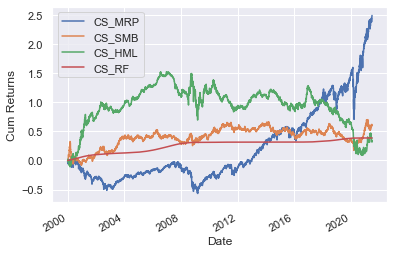

In [19]:
df_new[['CS_MRP', 'CS_SMB', 'CS_HML','CS_RF']].plot()
plt.ylabel('Cum Returns');

Extract the original four factors from the new dataframe when ‘Mkt-RF’ is zero or positive.

Display summary statistics

In [20]:
df_positive = df.loc[df['Mkt-RF']>=0,['Mkt-RF','SMB','HML','RF']]

In [21]:
df_positive.describe(), df_positive.cov()

(             Mkt-RF           SMB           HML            RF
 count  13679.000000  13679.000000  13679.000000  13679.000000
 mean       0.659230     -0.037342      0.045733      0.011932
 std        0.787917      0.593447      0.606118      0.011664
 min        0.000000    -11.620000     -4.890000     -0.003000
 25%        0.200000     -0.270000     -0.230000      0.001000
 50%        0.440000     -0.020000      0.000000      0.009000
 75%        0.840000      0.230000      0.260000      0.019000
 max       15.760000      8.210000      8.430000      0.061000,
           Mkt-RF       SMB       HML        RF
 Mkt-RF  0.620813 -0.107781  0.095827 -0.000546
 SMB    -0.107781  0.352180 -0.016312 -0.000629
 HML     0.095827 -0.016312  0.367379 -0.001835
 RF     -0.000546 -0.000629 -0.001835  0.000136)

Extract the original four factors from the new dataframe when ‘Mkt-RF’ is negative. 

Display summary statistics.

In [22]:
df_negative = df.loc[df['Mkt-RF']<0,['Mkt-RF','SMB','HML','RF']]

In [23]:
df_negative.describe(), df_negative.cov()

(             Mkt-RF           SMB           HML            RF
 count  11341.000000  11341.000000  11341.000000  11341.000000
 mean      -0.727375      0.056163     -0.023554      0.012556
 std        0.872480      0.578211      0.612189      0.012215
 min      -17.440000     -5.140000     -5.980000     -0.003000
 25%       -0.950000     -0.210000     -0.260000      0.001000
 50%       -0.460000      0.060000      0.010000      0.010000
 75%       -0.190000      0.320000      0.260000      0.020000
 max       -0.010000      6.190000      4.540000      0.061000,
           Mkt-RF       SMB       HML        RF
 Mkt-RF  0.761222 -0.026276  0.082318  0.000691
 SMB    -0.026276  0.334328 -0.024953  0.000540
 HML     0.082318 -0.024953  0.374775  0.002419
 RF      0.000691  0.000540  0.002419  0.000149)

In [24]:
df_positive.describe(), df_negative.describe()

(             Mkt-RF           SMB           HML            RF
 count  13679.000000  13679.000000  13679.000000  13679.000000
 mean       0.659230     -0.037342      0.045733      0.011932
 std        0.787917      0.593447      0.606118      0.011664
 min        0.000000    -11.620000     -4.890000     -0.003000
 25%        0.200000     -0.270000     -0.230000      0.001000
 50%        0.440000     -0.020000      0.000000      0.009000
 75%        0.840000      0.230000      0.260000      0.019000
 max       15.760000      8.210000      8.430000      0.061000,
              Mkt-RF           SMB           HML            RF
 count  11341.000000  11341.000000  11341.000000  11341.000000
 mean      -0.727375      0.056163     -0.023554      0.012556
 std        0.872480      0.578211      0.612189      0.012215
 min      -17.440000     -5.140000     -5.980000     -0.003000
 25%       -0.950000     -0.210000     -0.260000      0.001000
 50%       -0.460000      0.060000      0.010000      

Some comments regarding market risk premium are as follows.

First, there are more positive counts than negative counts. Good days are more than bad days in the market.

Secondly, the absolute value of the mean value is greater when the return is negative than is positive. A bad day loses more than a good day can earn on average.

Thirdly, the standard deviation is greater when the return is negative, a phenomenon that has been extensively documented in finance literature. The risk is higher during bad days.

Lastly, the entire return data is left skew: the absolute value of 75% in the positive subset is less than that of 25% in negative, and 50% also exhibits the same structure. 